In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
data = pd.read_csv("Road-Accident.csv", na_values = -1, parse_dates=['time'], infer_datetime_format=True)

/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
police_n = sorted(data.police_force.unique().tolist())
#print(police_n)

long = data.groupby(['police_force'])['longitude'].mean().values
lat = data.groupby(['police_force'])['latitude'].mean().values
#print(long)
data1 = data

#print(data.shape)



for i, row in data1.iterrows():
    #print(row['police_force'])
    if row['police_force'] != np.nan:
        ii = police_n.index(row['police_force'])
        data1.set_value(i,'longitude',long[ii])
        data1.set_value(i,'latitude',lat[ii])
    else:
        data1.set_value(i,'longitude',np.nan)
        data1.set_value(i,'latitude',np.nan)



/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


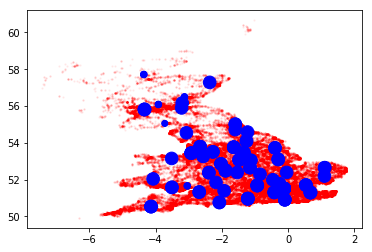

In [7]:
data1 = pd.read_csv("Road-Accident.csv", na_values = -1, parse_dates=['time'], infer_datetime_format=True)
counts = pd.crosstab(data.longitude, data.latitude).stack().reset_index(name='freq')
plt.scatter(data1.longitude,data1.latitude,s=2,c='r',marker='o',alpha=0.05)
plt.scatter(data.longitude,data.latitude,s=counts['freq']/300,c='b',marker='o',alpha=1)


plt.show()

In [ ]:
st = pd.Timestamp(year=1900, month=1, day=1)
def convert_date(x):
    return (pd.to_datetime(x,dayfirst=True) - st).days + 2
#print((pd.to_datetime('31/12/2014',dayfirst=True) - st).days + 2)
for i, row in data.iterrows():
    if len(row['date']) == 10:
        c = convert_date(row['date'])
        data.set_value(i,'date', c)